In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [2]:
df = pd.read_csv("PCOS_extended_dataset.csv")

In [3]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,193,193,0,30,69.979147,167.708055,23.185569,12,72,22,...,1,0.0,1,105.483401,76.096379,2,4,10.0,13.0,6.176029
1,360,360,0,36,63.711688,154.055877,25.441392,13,70,18,...,1,0.0,1,115.883740,79.117243,2,3,13.0,11.0,6.824718
2,10,10,0,36,51.848631,149.059804,23.928264,15,80,20,...,0,0.0,0,112.219711,80.919417,1,1,14.0,17.0,2.568691
3,278,278,1,29,66.893988,148.628036,27.894935,15,72,18,...,0,0.0,1,104.619624,69.902681,1,1,12.0,14.0,9.962732
4,71,71,0,33,52.536198,150.767409,23.079564,13,72,18,...,0,0.0,0,99.175454,70.330461,5,2,11.5,4.7,6.655190


In [4]:
pd.set_option('display.max_columns', None)  #pandas only show limited columns. Hence we wrote this to see all the columns

In [5]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,193,193,0,30,69.979147,167.708055,23.185569,12,72,22,12.0,4,5,10.0,1,1,455.80,121.8,5.70,2.37,2.41,37,32,0.86,2.36,5.76,10.79,28.70,0.25,108.0,0,1,0,0,1,0.0,1,105.483401,76.096379,2,4,10.0,13.0,6.176029
1,360,360,0,36,63.711688,154.055877,25.441392,13,70,18,10.5,2,6,12.0,1,0,418.90,418.9,2.85,1.71,1.67,38,35,0.92,1.54,3.09,26.09,20.16,0.31,95.0,1,0,0,1,1,0.0,1,115.883740,79.117243,2,3,13.0,11.0,6.824718
2,10,10,0,36,51.848631,149.059804,23.928264,15,80,20,10.0,4,2,4.0,0,0,1.99,1.99,2.80,1.51,1.85,40,38,0.95,6.65,1.61,11.74,27.70,0.25,125.0,0,0,0,0,0,0.0,0,112.219711,80.919417,1,1,14.0,17.0,2.568691
3,278,278,1,29,66.893988,148.628036,27.894935,15,72,18,12.0,4,5,9.0,0,0,1.99,1.99,2.56,2.41,1.06,36,34,0.94,2.86,7.3,12.91,19.00,0.39,92.0,0,1,1,1,0,0.0,1,104.619624,69.902681,1,1,12.0,14.0,9.962732
4,71,71,0,33,52.536198,150.767409,23.079564,13,72,18,10.2,2,5,9.0,0,0,4.42,1.99,4.85,0.72,6.74,40,33,0.83,2.00,1.01,15.64,42.36,0.52,92.0,0,0,0,0,0,0.0,0,99.175454,70.330461,5,2,11.5,4.7,6.655190


In [6]:
df.shape

(2000, 44)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  2000 non-null   int64  
 1   Patient File No.        2000 non-null   int64  
 2   PCOS (Y/N)              2000 non-null   int64  
 3    Age (yrs)              2000 non-null   int64  
 4   Weight (Kg)             2000 non-null   float64
 5   Height(Cm)              2000 non-null   float64
 6   BMI                     2000 non-null   float64
 7   Blood Group             2000 non-null   int64  
 8   Pulse rate(bpm)         2000 non-null   int64  
 9   RR (breaths/min)        2000 non-null   int64  
 10  Hb(g/dl)                2000 non-null   float64
 11  Cycle(R/I)              2000 non-null   int64  
 12  Cycle length(days)      2000 non-null   int64  
 13  Marraige Status (Yrs)   1997 non-null   float64
 14  Pregnant(Y/N)           2000 non-null   

In [8]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000
mean,266.633000,266.633000,0.304000,31.35400,59.527068,156.416496,24.284184,13.788000,73.241000,19.232000,11.153785,2.535500,4.972500,7.578718,0.381500,0.301000,640.599939,12.935498,9.873493,6.79915,37.995500,33.769000,0.889800,3.000138,24.486545,40.377968,0.688444,99.80980,0.380500,0.274500,0.290000,0.443500,0.477000,0.517000,0.257500,114.701590,76.989127,6.09000,6.50350,14.879300,15.410320,8.571637
std,154.058467,154.058467,0.460098,5.44982,11.445212,6.044243,4.132187,1.832958,4.098941,1.740601,0.868073,0.888332,1.422588,4.819652,0.485876,0.716698,3300.935367,195.419736,119.064554,56.12205,3.988914,3.590416,0.046565,3.237188,15.787810,254.819006,4.109938,19.48864,0.485631,0.446374,0.453876,0.496922,0.499596,0.499836,0.437366,7.564600,6.085313,4.23094,4.37362,3.641161,3.270965,2.217999
min,1.000000,1.000000,0.000000,20.00000,30.739215,136.539081,11.939138,11.000000,13.000000,16.000000,8.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.210000,0.020000,0.00000,26.000000,24.000000,0.760000,0.040000,0.400000,0.000000,0.047000,60.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.525778,7.680842,0.00000,0.00000,0.000000,0.000000,0.000000
25%,132.000000,132.000000,0.000000,28.00000,52.248684,152.169130,21.765743,13.000000,72.000000,18.000000,10.500000,2.000000,5.000000,4.000000,0.000000,0.000000,1.990000,3.390000,1.020000,1.42000,36.000000,32.000000,0.850000,1.510000,14.645000,20.800000,0.250000,92.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.564746,72.433707,3.00000,3.00000,13.000000,13.000000,7.099641
50%,267.000000,267.000000,0.000000,31.00000,58.538632,156.433674,24.188981,14.000000,72.000000,18.000000,11.000000,2.000000,5.000000,7.000000,0.000000,0.000000,12.370000,4.860000,2.330000,2.13000,38.000000,34.000000,0.890000,2.285000,21.780000,26.100000,0.320000,100.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,114.558163,78.340745,5.00000,6.00000,15.000000,16.000000,8.434753
75%,395.000000,395.000000,1.000000,35.00000,65.519518,160.064790,26.600461,15.000000,74.000000,20.000000,11.700000,4.000000,5.000000,10.000000,1.000000,0.000000,300.530000,6.470000,3.830000,3.87000,40.000000,36.000000,0.930000,3.642500,29.720000,35.660000,0.460000,107.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,120.190386,81.186301,8.25000,9.00000,18.000000,18.000000,9.876932
max,541.000000,541.000000,1.000000,48.00000,113.379053,180.388539,40.449415,18.000000,82.000000,28.000000,14.800000,5.000000,12.000000,30.000000,1.000000,5.000000,32460.970000,5052.000000,2018.000000,1372.83000,48.000000,47.000000,0.980000,65.000000,128.240000,6014.660000,85.000000,350.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,144.980616,104.267012,22.00000,20.00000,24.000000,24.000000,18.675452


In [9]:
df.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [10]:
df.columns = df.columns.str.strip()



In [11]:
df.columns = df.columns.str.replace(r"\s+", " ", regex=True)


In [12]:
df.dtypes

Sl. No                     int64
Patient File No.           int64
PCOS (Y/N)                 int64
Age (yrs)                  int64
Weight (Kg)              float64
Height(Cm)               float64
BMI                      float64
Blood Group                int64
Pulse rate(bpm)            int64
RR (breaths/min)           int64
Hb(g/dl)                 float64
Cycle(R/I)                 int64
Cycle length(days)         int64
Marraige Status (Yrs)    float64
Pregnant(Y/N)              int64
No. of abortions           int64
I beta-HCG(mIU/mL)       float64
II beta-HCG(mIU/mL)       object
FSH(mIU/mL)              float64
LH(mIU/mL)               float64
FSH/LH                   float64
Hip(inch)                  int64
Waist(inch)                int64
Waist:Hip Ratio          float64
TSH (mIU/L)              float64
AMH(ng/mL)                object
PRL(ng/mL)               float64
Vit D3 (ng/mL)           float64
PRG(ng/mL)               float64
RBS(mg/dl)               float64
Weight gai

In [13]:
df["II beta-HCG(mIU/mL)"].unique()[:10]


array(['121.8', '418.9', '1.99', '9.35', '5.39', '523.6', '161.49',
       '177.58', '433.97', '236.5'], dtype=object)

In [14]:
df["II beta-HCG(mIU/mL)"] = (
    df["II beta-HCG(mIU/mL)"]
    .astype(str)
    .str.strip()
    .str.replace(r"\.$", "", regex=True)   #removes trailing dots
)


In [15]:
df["II beta-HCG(mIU/mL)"] = pd.to_numeric(
    df["II beta-HCG(mIU/mL)"],
    errors="coerce"
)


In [16]:
df["II beta-HCG(mIU/mL)"].dtype


dtype('float64')

In [17]:
df.dtypes

Sl. No                     int64
Patient File No.           int64
PCOS (Y/N)                 int64
Age (yrs)                  int64
Weight (Kg)              float64
Height(Cm)               float64
BMI                      float64
Blood Group                int64
Pulse rate(bpm)            int64
RR (breaths/min)           int64
Hb(g/dl)                 float64
Cycle(R/I)                 int64
Cycle length(days)         int64
Marraige Status (Yrs)    float64
Pregnant(Y/N)              int64
No. of abortions           int64
I beta-HCG(mIU/mL)       float64
II beta-HCG(mIU/mL)      float64
FSH(mIU/mL)              float64
LH(mIU/mL)               float64
FSH/LH                   float64
Hip(inch)                  int64
Waist(inch)                int64
Waist:Hip Ratio          float64
TSH (mIU/L)              float64
AMH(ng/mL)                object
PRL(ng/mL)               float64
Vit D3 (ng/mL)           float64
PRG(ng/mL)               float64
RBS(mg/dl)               float64
Weight gai

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.isnull().sum()

Sl. No                   0
Patient File No.         0
PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    3
Pregnant(Y/N)            0
No. of abortions         0
I beta-HCG(mIU/mL)       0
II beta-HCG(mIU/mL)      0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
B

In [20]:
df = df.drop(columns=['Sl. No', 'Patient File No.'])

In [21]:
df['Age (yrs)'].value_counts()

Age (yrs)
28    192
32    172
30    139
35    132
36    119
29    119
31    116
27    115
26    108
34    101
33     82
23     76
40     70
25     70
38     68
24     65
37     58
22     30
41     30
39     28
42     22
21     19
45     14
20     14
43     13
47     10
44      9
48      6
46      3
Name: count, dtype: int64

In [22]:
df['Weight (Kg)'].value_counts()

Weight (Kg)
66.167495    1
52.065580    1
59.305108    1
70.463902    1
33.439368    1
            ..
52.536198    1
66.893988    1
51.848631    1
63.711688    1
69.979147    1
Name: count, Length: 2000, dtype: int64

In [23]:
df['Height(Cm)'].value_counts()

Height(Cm)
165.108053    1
142.103521    1
161.193785    1
157.087987    1
153.140662    1
             ..
150.767409    1
148.628036    1
149.059804    1
154.055877    1
167.708055    1
Name: count, Length: 2000, dtype: int64

In [24]:
df['BMI'].value_counts()

BMI
25.501831    1
25.391524    1
24.504233    1
27.538417    1
13.808412    1
            ..
23.079564    1
27.894935    1
23.928264    1
25.441392    1
23.185569    1
Name: count, Length: 2000, dtype: int64

In [25]:
df['Blood Group'].value_counts()

Blood Group
15    754
13    500
11    400
17    156
16     70
14     65
12     51
18      4
Name: count, dtype: int64

In [26]:
df['Pulse rate(bpm)'].value_counts()

Pulse rate(bpm)
72    1002
74     352
78     234
70     183
80      90
73      69
75      31
76      23
82      10
18       4
13       2
Name: count, dtype: int64

In [27]:
df['RR (breaths/min)'].value_counts()

RR (breaths/min)
18    1021
20     671
22     197
16      46
24      44
28      11
26       6
19       4
Name: count, dtype: int64

In [28]:
df['Hb(g/dl)'].value_counts()

Hb(g/dl)
11.00    217
10.80    214
10.50    185
12.00    162
11.20    138
10.20    138
11.50    138
10.00    129
11.10     80
10.70     64
12.50     58
11.80     53
12.40     46
11.70     40
12.10     30
12.80     29
10.60     28
13.20     23
9.40      21
11.40     21
10.40     20
11.90     20
10.30     17
13.80     12
13.40     11
12.20      9
11.30      9
14.00      9
10.48      7
12.70      6
9.50       6
10.10      6
12.30      6
11.60      5
13.00      5
8.50       5
12.60      5
10.90      5
9.80       4
12.01      4
9.00       4
14.80      3
10.09      3
12.90      3
13.30      1
14.20      1
Name: count, dtype: int64

In [29]:
df['Cycle(R/I)'].value_counts()

Cycle(R/I)
2    1466
4     531
5       3
Name: count, dtype: int64

In [30]:
df['Cycle length(days)'].value_counts()

Cycle length(days)
5     1045
6      346
4      223
3      128
2      122
7       69
9       32
11      15
8        8
12       7
10       4
0        1
Name: count, dtype: int64

In [31]:
df['Marraige Status (Yrs)'].value_counts()

Marraige Status (Yrs)
3.0     198
4.0     195
5.0     169
8.0     167
10.0    151
7.0     150
6.0     139
2.0     138
12.0    127
13.0     80
15.0     60
11.0     59
9.0      51
1.0      49
14.0     46
3.5      29
16.0     25
2.5      22
18.0     21
17.0     20
6.5      16
1.5      14
25.0     12
19.0      9
22.0      8
7.5       7
2.2       6
23.0      5
20.0      5
30.0      5
24.0      5
8.5       4
4.5       3
0.0       2
Name: count, dtype: int64

In [32]:
df['Pregnant(Y/N)'].value_counts()

Pregnant(Y/N)
0    1237
1     763
Name: count, dtype: int64

In [33]:
df['No. of abortions'].value_counts()

No. of abortions
0    1603
1     261
2      89
3      32
4       8
5       7
Name: count, dtype: int64

In [34]:
df['I beta-HCG(mIU/mL)'].value_counts()

I beta-HCG(mIU/mL)
1.99      731
10.00      47
2.00       29
347.98     15
272.78     15
         ... 
1.89        1
184.80      1
270.49      1
230.53      1
689.58      1
Name: count, Length: 303, dtype: int64

In [35]:
df['II beta-HCG(mIU/mL)'].value_counts()

II beta-HCG(mIU/mL)
1.99      1141
2.00        31
12.00       17
15.00       16
6.19        12
          ... 
273.70       1
181.23       1
230.53       1
19.44        1
11.24        1
Name: count, Length: 199, dtype: int64

In [36]:
df['FSH(mIU/mL)'].value_counts()

FSH(mIU/mL)
3.99    24
5.71    22
5.01    22
1.00    21
4.33    17
        ..
6.05     1
6.73     1
7.38     1
2.52     1
5.18     1
Name: count, Length: 363, dtype: int64

In [37]:
df['LH(mIU/mL)'].value_counts()

LH(mIU/mL)
1.97    21
0.79    20
0.63    20
0.30    20
5.11    19
        ..
2.16     1
4.54     1
3.55     1
6.02     1
3.71     1
Name: count, Length: 340, dtype: int64

In [38]:
df['FSH/LH'].value_counts()

FSH/LH
2.83    27
0.80    22
2.02    22
1.64    19
2.01    18
        ..
5.76     1
6.17     1
2.36     1
0.38     1
4.39     1
Name: count, Length: 332, dtype: int64

In [39]:
df['Hip(inch)'].value_counts()

Hip(inch)
38    397
39    234
36    231
42    177
40    165
37    116
32     96
34     95
35     85
44     83
45     63
30     61
41     57
28     41
46     33
33     27
48     25
26      9
43      5
Name: count, dtype: int64

In [40]:
df['Waist(inch)']

0       32
1       35
2       38
3       34
4       33
        ..
1995    36
1996    43
1997    30
1998    28
1999    39
Name: Waist(inch), Length: 2000, dtype: int64

In [41]:
df['Waist:Hip Ratio'].value_counts()

Waist:Hip Ratio
0.89    239
0.94    212
0.92    196
0.95    153
0.90    143
0.88    138
0.84    129
0.86    109
0.83    105
0.93     98
0.85     83
0.82     73
0.87     67
0.91     56
0.81     52
0.97     35
0.79     34
0.96     29
0.80     16
0.98     13
0.78     12
0.76      8
Name: count, dtype: int64

In [42]:
df['TSH (mIU/L)'].value_counts()

TSH (mIU/L)
5.00    68
1.00    27
1.86    22
1.98    21
1.40    21
        ..
1.11     1
3.78     1
2.67     1
1.35     1
1.96     1
Name: count, Length: 304, dtype: int64

In [43]:
df['AMH(ng/mL)'].value_counts()

AMH(ng/mL)
1.2      28
2.5      26
4.2      25
3.9      24
6        23
         ..
1.53      1
0.33      1
18        1
10.32     1
28.6      1
Name: count, Length: 298, dtype: int64

In [44]:
df['PRL(ng/mL)'].value_counts()

PRL(ng/mL)
8.10     16
28.08    15
33.04    15
40.47    15
22.29    13
         ..
15.28     1
24.63     1
35.03     1
12.62     1
11.24     1
Name: count, Length: 473, dtype: int64

In [45]:
df['Vit D3 (ng/mL)'].value_counts()

Vit D3 (ng/mL)
17.10    26
18.70    25
25.60    24
24.30    23
30.50    20
         ..
36.40     1
39.70     1
31.55     1
38.63     1
46.30     1
Name: count, Length: 326, dtype: int64

In [46]:
df['PRG(ng/mL)'].value_counts()

PRG(ng/mL)
0.250    618
0.300    111
0.400     69
0.350     68
0.500     55
        ... 
0.730      1
0.362      1
0.610      1
0.970      1
1.200      1
Name: count, Length: 88, dtype: int64

In [47]:
df['RBS(mg/dl)'].value_counts()

RBS(mg/dl)
100.0    444
92.0     368
91.0      91
93.0      84
115.0     82
108.0     80
85.0      71
84.0      64
116.0     64
110.0     59
107.0     53
80.0      44
120.0     27
125.0     27
90.0      26
130.0     26
86.0      25
95.0      25
106.0     22
70.0      22
112.0     21
98.0      20
88.0      19
82.0      19
138.0     19
133.0     18
87.0      15
76.0      13
140.0     13
102.0     12
73.0      12
72.0      11
94.0      10
83.0       9
123.0      9
60.0       7
77.0       6
79.0       6
131.0      5
350.0      5
134.0      5
104.0      5
97.0       5
109.0      4
146.0      4
160.0      4
225.0      4
122.0      3
83.2       3
103.0      3
75.0       3
105.0      2
113.0      1
127.0      1
Name: count, dtype: int64

In [48]:
df['Weight gain(Y/N)'].value_counts()

Weight gain(Y/N)
0    1239
1     761
Name: count, dtype: int64

In [49]:
df['hair growth(Y/N)'].value_counts()

hair growth(Y/N)
0    1451
1     549
Name: count, dtype: int64

In [50]:
df['Skin darkening (Y/N)'].value_counts()

Skin darkening (Y/N)
0    1420
1     580
Name: count, dtype: int64

In [51]:
df['Hair loss(Y/N)'].value_counts()

Hair loss(Y/N)
0    1113
1     887
Name: count, dtype: int64

In [52]:
df['Pimples(Y/N)'].value_counts()

Pimples(Y/N)
0    1046
1     954
Name: count, dtype: int64

In [53]:
df['Fast food (Y/N)'].value_counts()

Fast food (Y/N)
1.0    1034
0.0     966
Name: count, dtype: int64

In [54]:
df["Fast food (Y/N)"] = df["Fast food (Y/N)"].astype(int)


In [55]:
df['Fast food (Y/N)'].value_counts()

Fast food (Y/N)
1    1034
0     966
Name: count, dtype: int64

In [56]:
df['Reg.Exercise(Y/N)'].value_counts()

Reg.Exercise(Y/N)
0    1485
1     515
Name: count, dtype: int64

In [57]:
df['BP _Systolic (mmHg)'].value_counts()

BP _Systolic (mmHg)
114.851442    1
120.844149    1
125.022084    1
111.236721    1
124.359343    1
             ..
99.175454     1
104.619624    1
112.219711    1
115.883740    1
105.483401    1
Name: count, Length: 2000, dtype: int64

In [58]:
df['BP _Diastolic (mmHg)'].value_counts()

BP _Diastolic (mmHg)
81.554572    1
77.295079    1
81.077336    1
76.158880    1
80.993959    1
            ..
70.330461    1
69.902681    1
80.919417    1
79.117243    1
76.096379    1
Name: count, Length: 2000, dtype: int64

In [59]:
df['Follicle No. (L)'].value_counts()

Follicle No. (L)
1     233
3     233
4     181
6     180
5     178
2     160
7     152
8     146
9     109
10     85
12     77
11     66
14     53
0      37
15     28
13     26
16     23
18     13
21     11
20      5
22      4
Name: count, dtype: int64

In [60]:
df['Follicle No. (R)'].value_counts()

Follicle No. (R)
7     231
5     223
2     199
3     183
10    172
1     168
4     166
6     123
9      99
12     97
8      71
11     45
14     41
0      38
15     37
13     28
16     25
20     20
18     19
19     15
Name: count, dtype: int64

In [61]:
df['Avg. F size (L) (mm)'].value_counts()

Avg. F size (L) (mm)
15.0    293
18.0    257
14.0    223
16.0    189
19.0    164
17.0    161
13.0    145
12.0    133
10.0     98
11.0     93
20.0     69
8.0      28
0.0      27
21.0     22
7.0      12
17.5     11
2.0       9
22.0      9
18.5      7
9.5       7
9.0       7
7.5       5
24.0      5
10.5      5
15.5      4
14.5      4
5.0       4
12.5      3
11.5      2
6.5       2
6.8       2
Name: count, dtype: int64

In [62]:
df['Avg. F size (R) (mm)'].value_counts()

Avg. F size (R) (mm)
18.00    293
15.00    241
17.00    221
16.00    206
14.00    198
19.00    186
12.00    154
13.00    146
20.00     90
11.00     86
10.00     33
9.00      28
21.00     25
7.00      11
8.00       7
6.00       7
22.00      7
23.00      6
13.50      6
5.80       6
8.50       6
0.00       5
4.50       5
5.00       5
16.50      5
17.50      5
6.20       3
24.00      3
4.70       2
0.17       2
10.50      1
11.50      1
Name: count, dtype: int64

In [63]:
df['Endometrium (mm)'].value_counts()

Endometrium (mm)
0.000000     5
5.916112     1
9.950989     1
6.176029     1
6.824718     1
            ..
8.914599     1
12.920838    1
4.492633     1
6.144585     1
6.615065     1
Name: count, Length: 1996, dtype: int64

In [64]:
df['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    1392
1     608
Name: count, dtype: int64

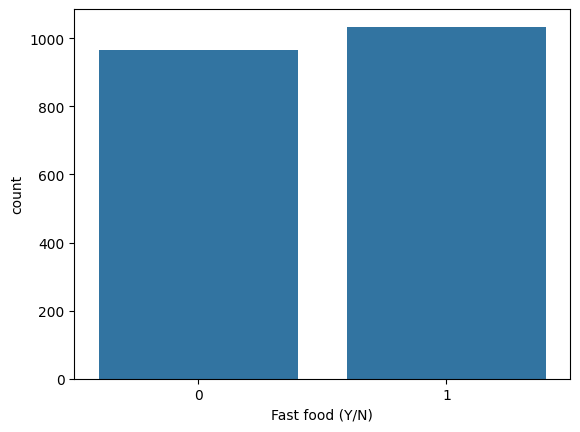

In [65]:
sns.countplot(x="Fast food (Y/N)", data=df)
plt.show()

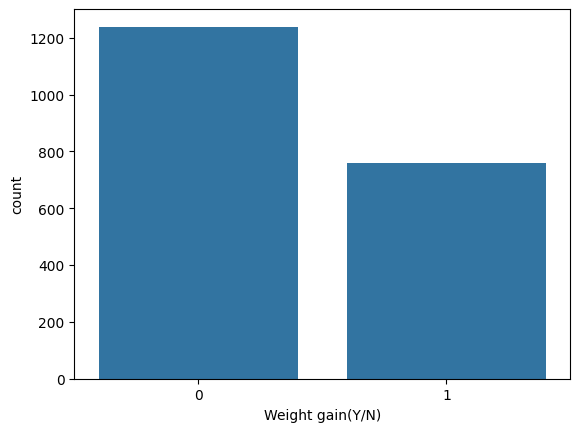

In [66]:
sns.countplot(x='Weight gain(Y/N)', data=df)
plt.show()

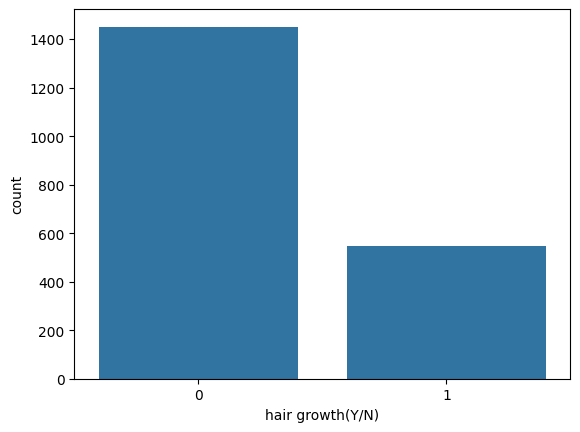

In [67]:
sns.countplot(x='hair growth(Y/N)', data=df)
plt.show()

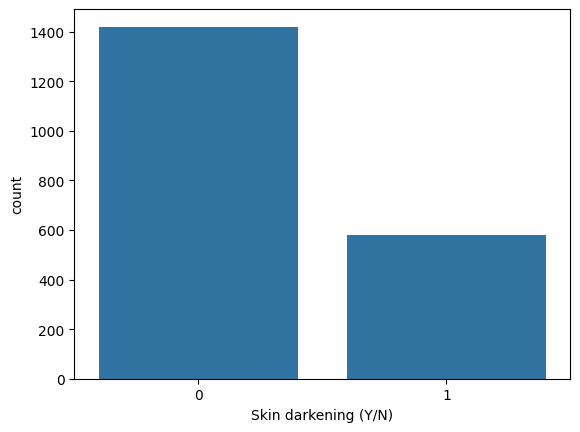

In [68]:
sns.countplot(x='Skin darkening (Y/N)', data=df)
plt.show()


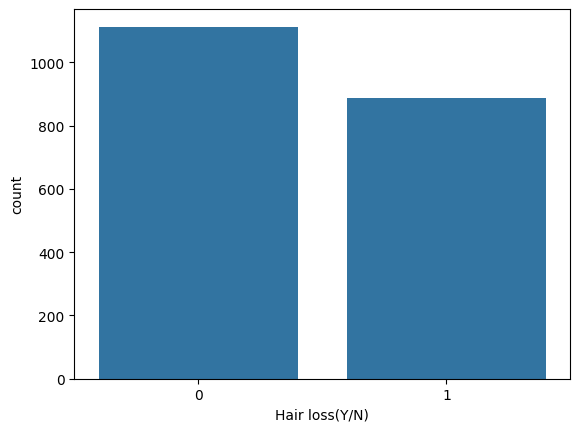

In [69]:
sns.countplot(x='Hair loss(Y/N)', data=df)
plt.show()

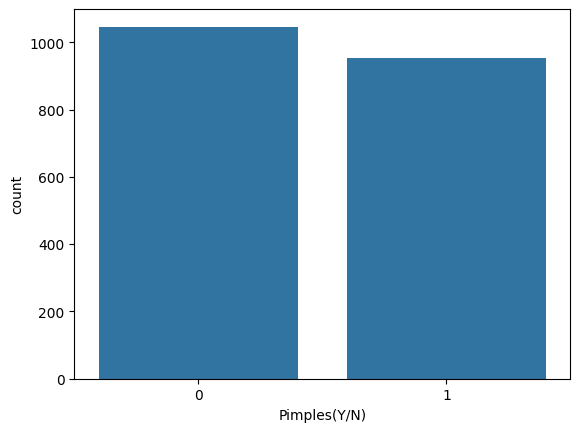

In [70]:
sns.countplot(x='Pimples(Y/N)', data=df)
plt.show()

In [71]:
df.rename(columns={"hair growth(Y/N)": "Hair growth(Y/N)"}, inplace=True)


In [72]:
df.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'Hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

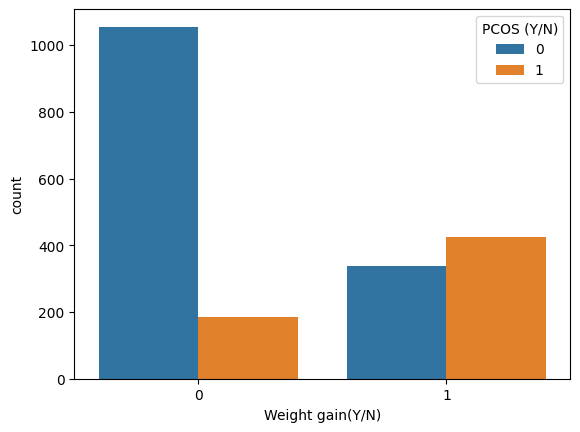

In [73]:
sns.countplot(x="Weight gain(Y/N)", hue="PCOS (Y/N)", data=df)   #depicts that with increase in weight pcos chances increases
plt.show()


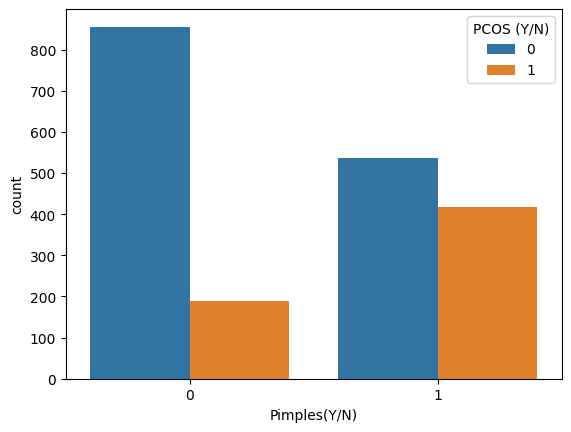

In [74]:
sns.countplot(x="Pimples(Y/N)", hue="PCOS (Y/N)", data=df)  #depicts that with increase in pimples pcos chances increases
plt.show()

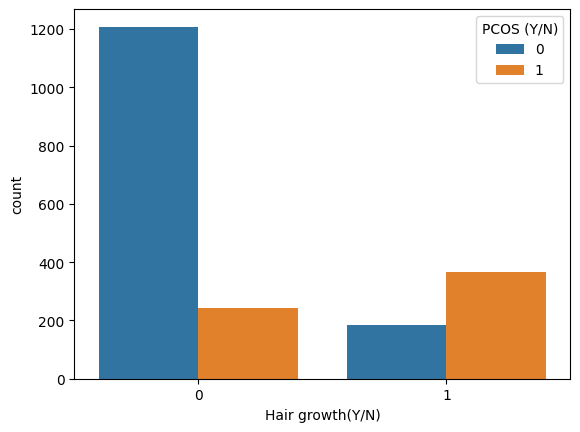

In [75]:
sns.countplot(x="Hair growth(Y/N)", hue="PCOS (Y/N)", data=df)
plt.show()

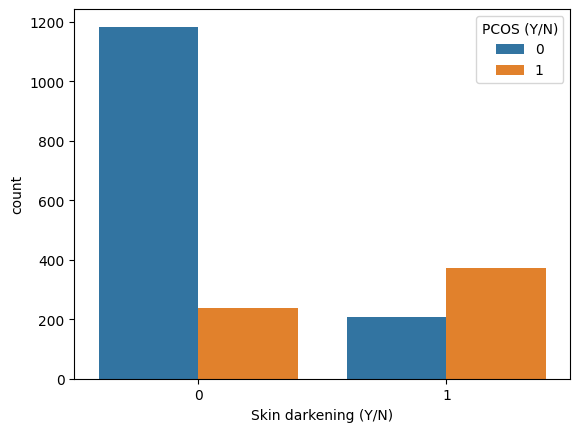

In [76]:
sns.countplot(x="Skin darkening (Y/N)", hue="PCOS (Y/N)", data=df)
plt.show()

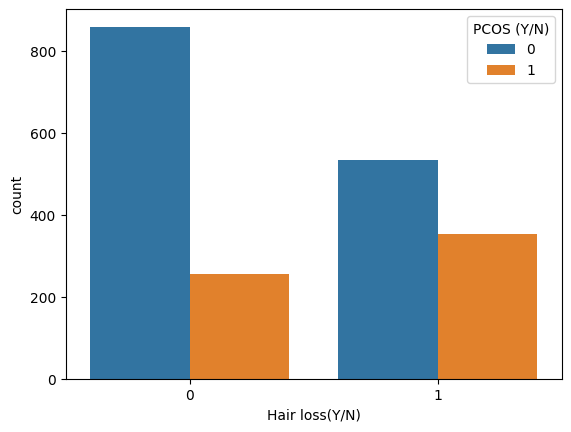

In [77]:
sns.countplot(x="Hair loss(Y/N)", hue="PCOS (Y/N)", data=df)
plt.show()

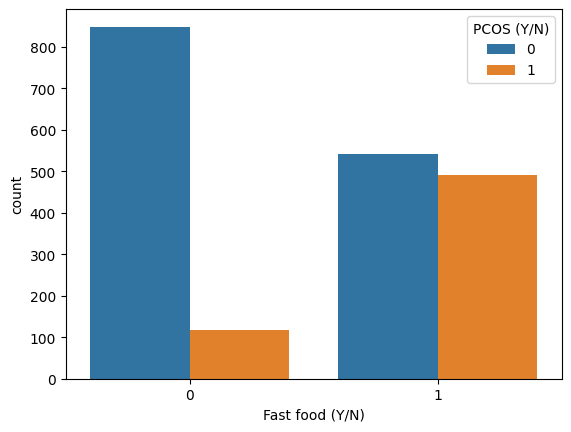

In [78]:

sns.countplot(x="Fast food (Y/N)", hue="PCOS (Y/N)", data=df)   #fast food increases chances of pcos
plt.show()

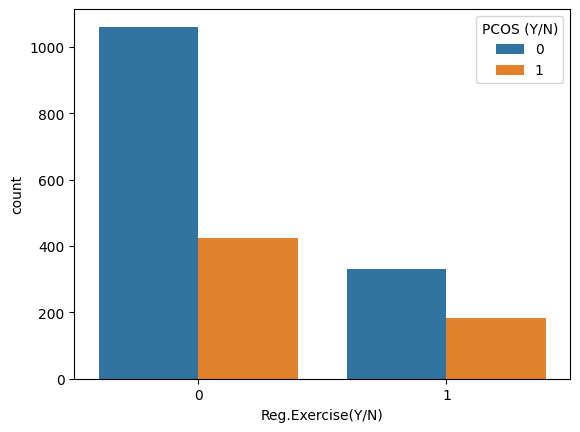

In [79]:
sns.countplot(x="Reg.Exercise(Y/N)", hue="PCOS (Y/N)", data=df)  #depicts that with regular exercises chances of pcos decreases
plt.show()

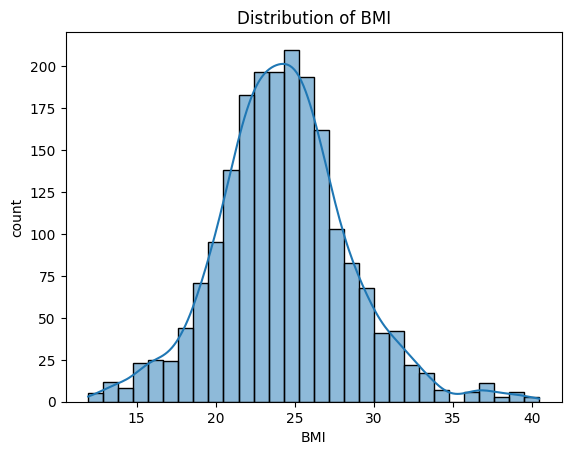

In [80]:
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("count")
plt.show()

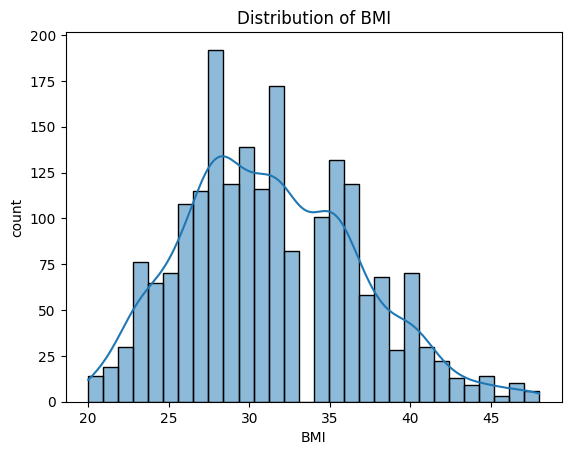

In [81]:
sns.histplot(df['Age (yrs)'], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("count")
plt.show()

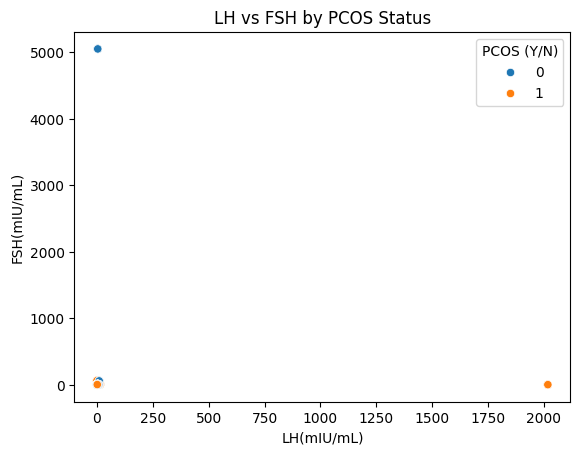

In [82]:
sns.scatterplot(x="LH(mIU/mL)",y="FSH(mIU/mL)",hue="PCOS (Y/N)",data=df)
plt.title("LH vs FSH by PCOS Status")
plt.show()


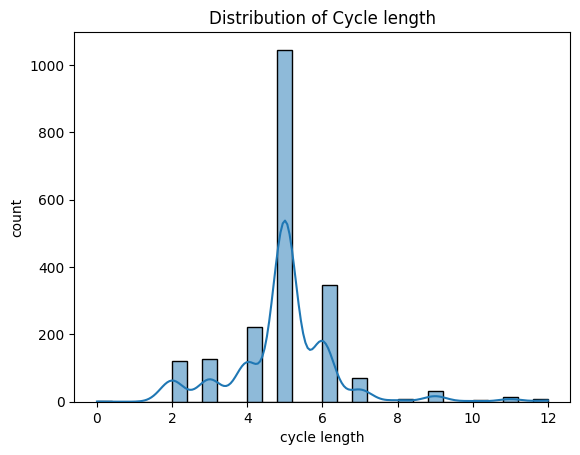

In [83]:
sns.histplot(df['Cycle length(days)'], bins=30, kde=True)
plt.title("Distribution of Cycle length")
plt.xlabel("cycle length")
plt.ylabel("count")
plt.show()

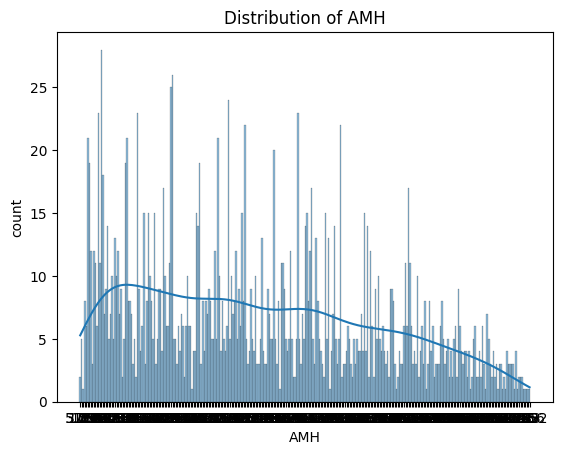

In [84]:
sns.histplot(df['AMH(ng/mL)'], bins=30, kde=True)
plt.title("Distribution of AMH")
plt.xlabel("AMH")
plt.ylabel("count")
plt.show()

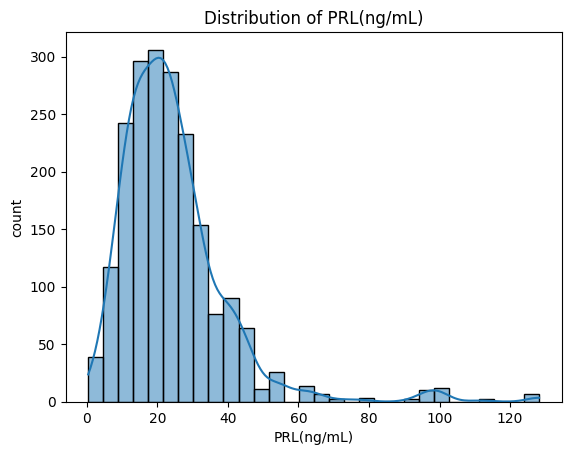

In [85]:
sns.histplot(df['PRL(ng/mL)'], bins=30, kde=True)
plt.title("Distribution of PRL(ng/mL)")
plt.xlabel("PRL(ng/mL)")
plt.ylabel("count")
plt.show()

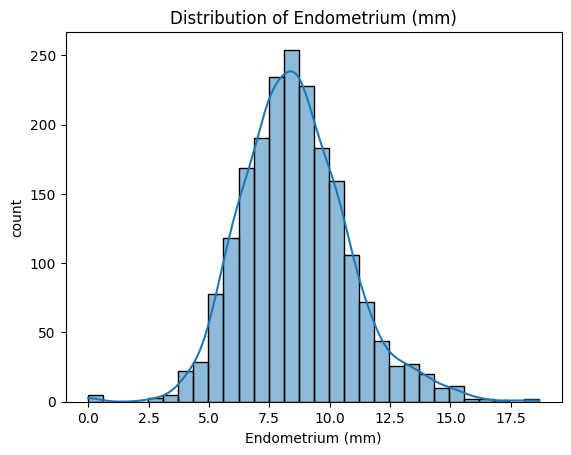

In [86]:
sns.histplot(df['Endometrium (mm)'], bins=30, kde=True)
plt.title("Distribution of Endometrium (mm)")
plt.xlabel("Endometrium (mm)")
plt.ylabel("count")
plt.show()

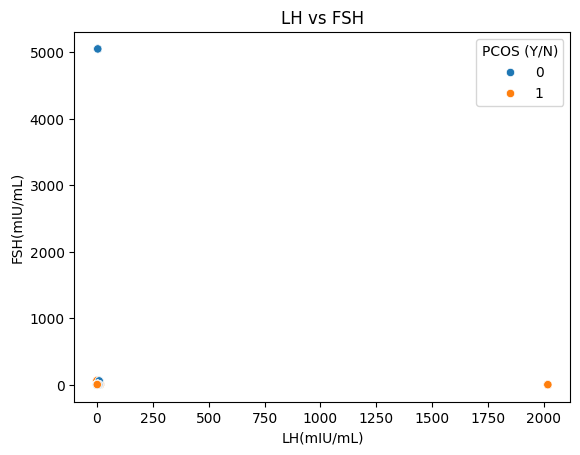

In [87]:
sns.scatterplot(
    x="LH(mIU/mL)",
    y="FSH(mIU/mL)",
    hue="PCOS (Y/N)",
    data=df
)
plt.title("LH vs FSH")
plt.show()


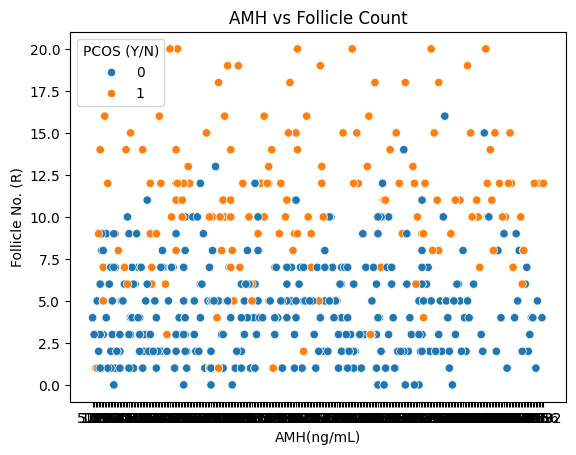

In [88]:
sns.scatterplot(
    x="AMH(ng/mL)",
    y="Follicle No. (R)",
    hue="PCOS (Y/N)",
    data=df
)
plt.title("AMH vs Follicle Count")
plt.show()


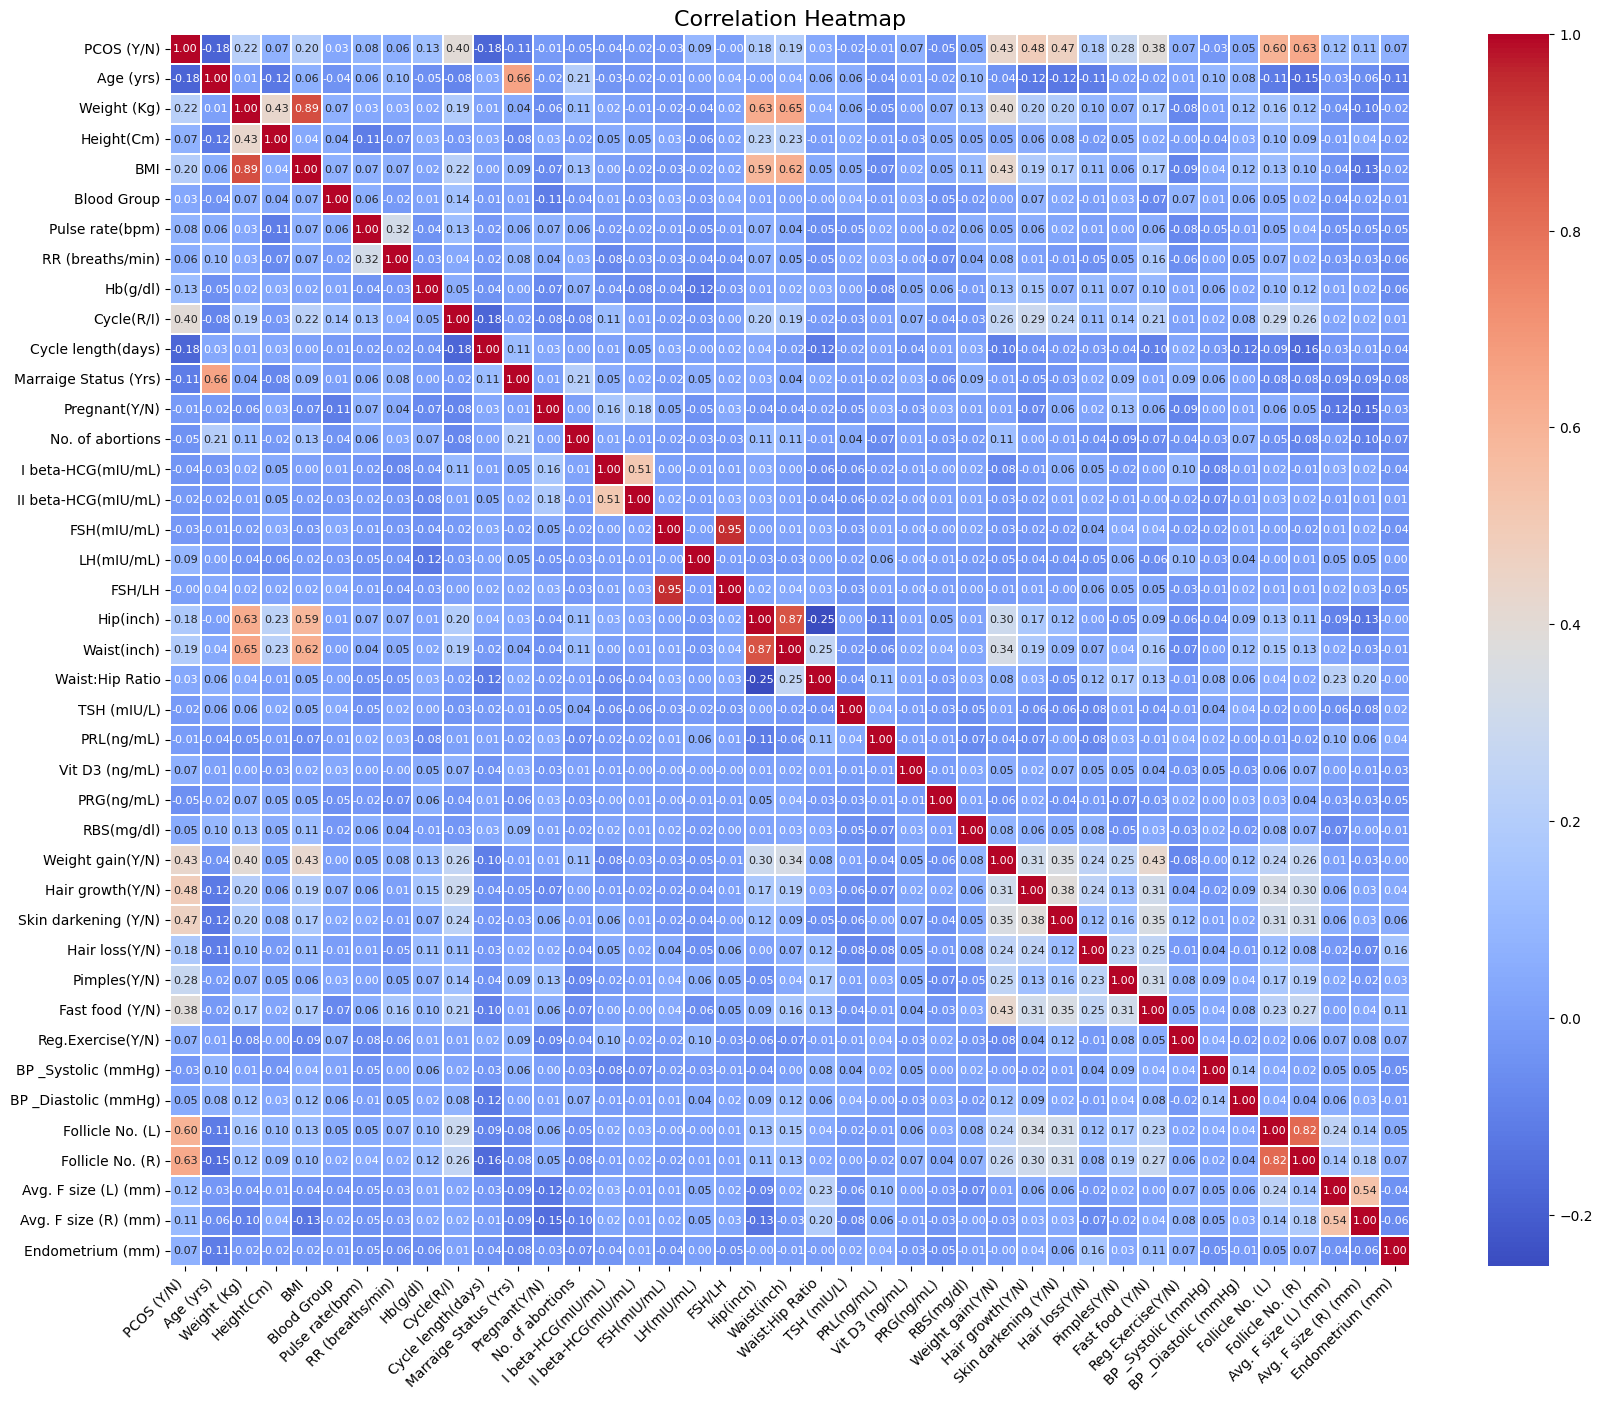

In [89]:

plt.figure(figsize=(20, 16))   # bigger figure

sns.heatmap(
    df.select_dtypes(include="number").corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},      # increase number size
    linewidths=0.3
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [90]:
df.columns

Index(['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of abortions', 'I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'Hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [91]:
df["Avg Follicle Count"] = (
    df["Follicle No. (L)"] + df["Follicle No. (R)"]
) / 2


In [92]:
df["Avg Follicle Size (mm)"] = (
    df["Avg. F size (L) (mm)"] + df["Avg. F size (R) (mm)"]
) / 2


In [93]:
df["Obese"] = (df["BMI"] >= 30).astype(int)


In [94]:
df['Obese'].value_counts()

Obese
0    1843
1     157
Name: count, dtype: int64

In [95]:
df['Avg Follicle Count'].value_counts()

Avg Follicle Count
3.0     133
6.0     129
4.0     116
6.5     115
1.0     112
2.5     111
5.0      96
1.5      94
2.0      88
9.5      84
5.5      80
7.5      68
8.0      68
8.5      68
3.5      62
7.0      58
9.0      58
10.5     57
10.0     49
0.5      47
4.5      40
12.5     40
11.5     37
13.0     30
12.0     25
15.0     21
13.5     20
16.5     18
15.5     16
14.0     13
11.0      9
14.5      9
19.0      9
20.0      8
20.5      7
16.0      3
18.0      2
Name: count, dtype: int64

In [96]:
df['Avg Follicle Size (mm)'].value_counts

<bound method IndexOpsMixin.value_counts of 0       11.5
1       12.0
2       15.5
3       13.0
4        8.1
        ... 
1995    14.0
1996    19.0
1997    13.5
1998    17.5
1999    15.5
Name: Avg Follicle Size (mm), Length: 2000, dtype: float64>

In [97]:
df.columns = df.columns.str.replace(r"\s+\(", "(", regex=True)   #removes space between col name and their units


In [98]:
df.dtypes

PCOS(Y/N)                  int64
Age(yrs)                   int64
Weight(Kg)               float64
Height(Cm)               float64
BMI                      float64
Blood Group                int64
Pulse rate(bpm)            int64
RR(breaths/min)            int64
Hb(g/dl)                 float64
Cycle(R/I)                 int64
Cycle length(days)         int64
Marraige Status(Yrs)     float64
Pregnant(Y/N)              int64
No. of abortions           int64
I beta-HCG(mIU/mL)       float64
II beta-HCG(mIU/mL)      float64
FSH(mIU/mL)              float64
LH(mIU/mL)               float64
FSH/LH                   float64
Hip(inch)                  int64
Waist(inch)                int64
Waist:Hip Ratio          float64
TSH(mIU/L)               float64
AMH(ng/mL)                object
PRL(ng/mL)               float64
Vit D3(ng/mL)            float64
PRG(ng/mL)               float64
RBS(mg/dl)               float64
Weight gain(Y/N)           int64
Hair growth(Y/N)           int64
Skin darke

In [99]:
target_col = "PCOS(Y/N)"

cols = [col for col in df.columns if col != target_col] + [target_col]
df = df[cols]


In [100]:
df.columns

Index(['Age(yrs)', 'Weight(Kg)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status(Yrs)', 'Pregnant(Y/N)',
       'No. of abortions', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH(mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3(ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'Hair growth(Y/N)', 'Skin darkening(Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food(Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic(mmHg)', 'BP _Diastolic(mmHg)', 'Follicle No.(L)',
       'Follicle No.(R)', 'Avg. F size(L)(mm)', 'Avg. F size(R)(mm)',
       'Endometrium(mm)', 'Avg Follicle Count', 'Avg Follicle Size(mm)',
       'Obese', 'PCOS(Y/N)'],
      dtype='object')

In [101]:
df = df.drop(columns=['Weight(Kg)', 'Height(Cm)', 'Waist(inch)', 'Hip(inch)', 'Follicle No.(L)', 'Follicle No.(R)', 'Marraige Status(Yrs)', 'Blood Group',
                      'RR(breaths/min)', 'Pulse rate(bpm)', 'Avg. F size(L)(mm)', 'Avg. F size(R)(mm)'])

In [102]:
df.head()

,Age(yrs),BMI,Hb(g/dl),Cycle(R/I),Cycle length(days),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Waist:Hip Ratio,TSH(mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3(ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),Hair growth(Y/N),Skin darkening(Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food(Y/N),Reg.Exercise(Y/N),BP _Systolic(mmHg),BP _Diastolic(mmHg),Endometrium(mm),Avg Follicle Count,Avg Follicle Size(mm),Obese,PCOS(Y/N)
0,30,23.185569,12.0,4,5,1,1,455.80,121.80,5.70,2.37,2.41,0.86,2.36,5.76,10.79,28.70,0.25,108.0,0,1,0,0,1,0,1,105.483401,76.096379,6.176029,3.0,11.5,0,0
1,36,25.441392,10.5,2,6,1,0,418.90,418.90,2.85,1.71,1.67,0.92,1.54,3.09,26.09,20.16,0.31,95.0,1,0,0,1,1,0,1,115.883740,79.117243,6.824718,2.5,12.0,0,0
2,36,23.928264,10.0,4,2,0,0,1.99,1.99,2.80,1.51,1.85,0.95,6.65,1.61,11.74,27.70,0.25,125.0,0,0,0,0,0,0,0,112.219711,80.919417,2.568691,1.0,15.5,0,0
3,29,27.894935,12.0,4,5,0,0,1.99,1.99,2.56,2.41,1.06,0.94,2.86,7.3,12.91,19.00,0.39,92.0,0,1,1,1,0,0,1,104.619624,69.902681,9.962732,1.0,13.0,0,1
4,33,23.079564,10.2,2,5,0,0,4.42,1.99,4.85,0.72,6.74,0.83,2.00,1.01,15.64,42.36,0.52,92.0,0,0,0,0,0,0,0,99.175454,70.330461,6.655190,3.5,8.1,0,0


In [103]:
df.shape

(2000, 33)

In [104]:
#TRAIN TEST SPLIT


In [105]:
X=df.drop(columns=["PCOS(Y/N)"])
y=df["PCOS(Y/N)"]

In [106]:
X

,Age(yrs),BMI,Hb(g/dl),Cycle(R/I),Cycle length(days),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Waist:Hip Ratio,TSH(mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3(ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),Hair growth(Y/N),Skin darkening(Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food(Y/N),Reg.Exercise(Y/N),BP _Systolic(mmHg),BP _Diastolic(mmHg),Endometrium(mm),Avg Follicle Count,Avg Follicle Size(mm),Obese
0,30,23.185569,12.0,4,5,1,1,455.80,121.80,5.70,2.37,2.41,0.86,2.36,5.76,10.79,28.70,0.25,108.0,0,1,0,0,1,0,1,105.483401,76.096379,6.176029,3.0,11.5,0
1,36,25.441392,10.5,2,6,1,0,418.90,418.90,2.85,1.71,1.67,0.92,1.54,3.09,26.09,20.16,0.31,95.0,1,0,0,1,1,0,1,115.883740,79.117243,6.824718,2.5,12.0,0
2,36,23.928264,10.0,4,2,0,0,1.99,1.99,2.80,1.51,1.85,0.95,6.65,1.61,11.74,27.70,0.25,125.0,0,0,0,0,0,0,0,112.219711,80.919417,2.568691,1.0,15.5,0
3,29,27.894935,12.0,4,5,0,0,1.99,1.99,2.56,2.41,1.06,0.94,2.86,7.3,12.91,19.00,0.39,92.0,0,1,1,1,0,0,1,104.619624,69.902681,9.962732,1.0,13.0,0
4,33,23.079564,10.2,2,5,0,0,4.42,1.99,4.85,0.72,6.74,0.83,2.00,1.01,15.64,42.36,0.52,92.0,0,0,0,0,0,0,0,99.175454,70.330461,6.655190,3.5,8.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,31,26.662263,12.1,4,9,0,0,1.99,1.99,2.34,0.39,6.00,0.86,2.70,3.81,22.52,29.80,0.30,84.0,0,0,0,0,0,0,0,120.323951,83.738573,9.816150,9.0,14.0,0
1996,37,27.681715,10.7,2,4,0,0,316.49,1.99,8.06,3.28,2.46,0.98,1.74,0.9,10.91,24.30,0.33,107.0,0,1,0,1,0,1,0,109.738395,76.083303,7.930382,6.0,19.0,0
1997,32,20.041406,11.9,2,6,0,0,1.99,1.99,3.99,0.51,7.82,0.83,2.04,2.83,28.71,60.20,0.15,84.0,0,0,0,1,1,1,0,109.570220,61.778231,6.832224,5.0,13.5,0
1998,40,13.793101,10.0,2,3,0,1,1.99,1.99,5.01,1.60,3.13,0.93,5.00,8.5,23.30,27.70,0.27,88.0,0,0,0,0,0,1,1,119.456176,79.410616,7.636086,5.5,17.5,0


In [107]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    1
Name: PCOS(Y/N), Length: 2000, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [109]:
#HANDLING OUTLIERS

C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\3132710789.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['BMI'])


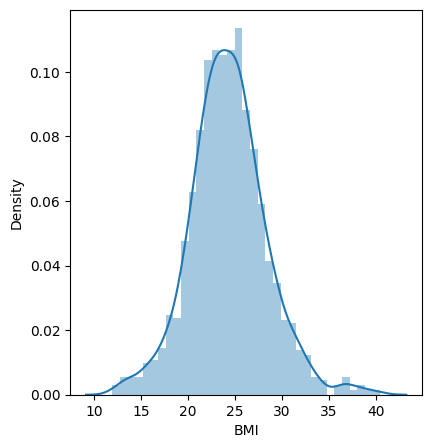

In [110]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_train['BMI'])
plt.show()

In [111]:
print("Skewness before handling:", X_train['BMI'].skew())  # we will use iqr methos because high values in bmi are not measurement errors but they represent obese

Skewness before handling: 0.2893733884555887


In [112]:
X_train['BMI'].describe()

count    1600.000000
mean       24.299429
std         4.041874
min        11.939138
25%        21.801586
50%        24.185059
75%        26.629266
max        40.449415
Name: BMI, dtype: float64

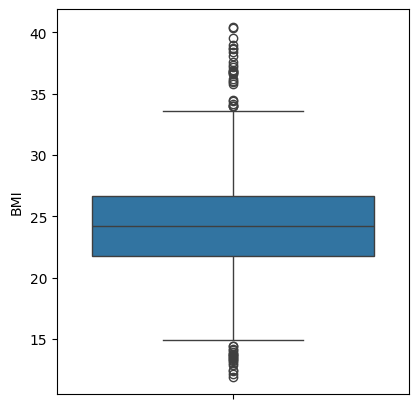

In [113]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['BMI'])
plt.show()

In [114]:
Q1 = X_train['BMI'].quantile(0.25)
Q3 = X_train['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Capping
X_train['BMI'] = X_train['BMI'].clip(lower_bound, upper_bound)
X_test['BMI']  = X_test['BMI'].clip(lower_bound, upper_bound)


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\3839579640.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['BMI'])


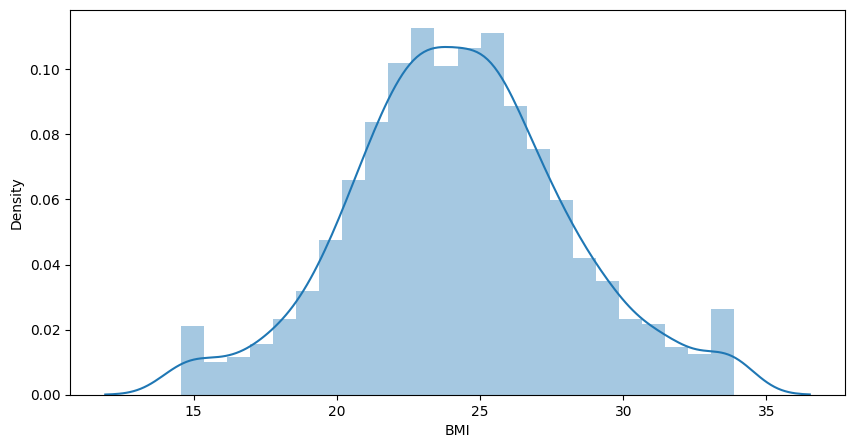

In [115]:
plt.figure(figsize=(10,5))
sns.distplot(X_train['BMI'])
plt.show()

In [116]:
print("Skewness after handling:", X_train['BMI'].skew())

Skewness after handling: 0.08438189064272705


In [117]:
X_train['BMI'].describe()

count    1600.000000
mean       24.263973
std         3.855041
min        14.560066
25%        21.801586
50%        24.185059
75%        26.629266
max        33.870786
Name: BMI, dtype: float64

C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\1444809754.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Hb(g/dl)'])


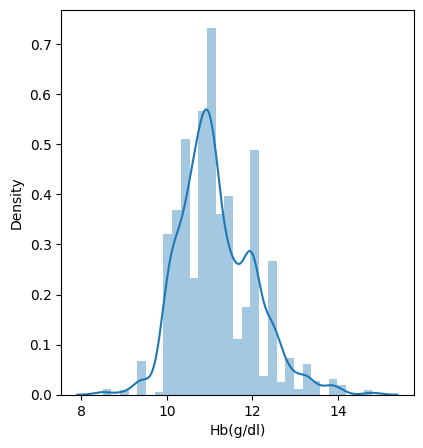

In [118]:
#another column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_train['Hb(g/dl)'])
plt.show()

In [119]:
print("Skewness before handling:", X_train['Hb(g/dl)'].skew())

Skewness before handling: 0.6484810941693865


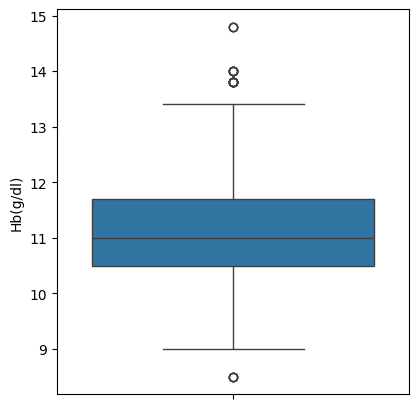

In [120]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['Hb(g/dl)'])
plt.show()

In [121]:
mean = X_train['Hb(g/dl)'].mean()
std  = X_train['Hb(g/dl)'].std()


lower_bound = mean - 3 * std
upper_bound = mean + 3 * std


X_train['Hb(g/dl)'] = X_train['Hb(g/dl)'].clip(lower_bound, upper_bound)
X_test['Hb(g/dl)']  = X_test['Hb(g/dl)'].clip(lower_bound, upper_bound)


In [122]:
print("Skewness after handling:", X_train['Hb(g/dl)'].skew())

Skewness after handling: 0.5543841114770576


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\2986414628.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['I beta-HCG(mIU/mL)'])


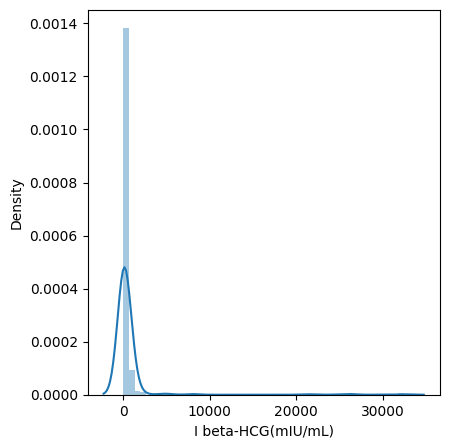

In [123]:
#another col
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_train['I beta-HCG(mIU/mL)'])
plt.show()

In [124]:
X_train['I beta-HCG(mIU/mL)'].skew()

np.float64(7.734038452181414)

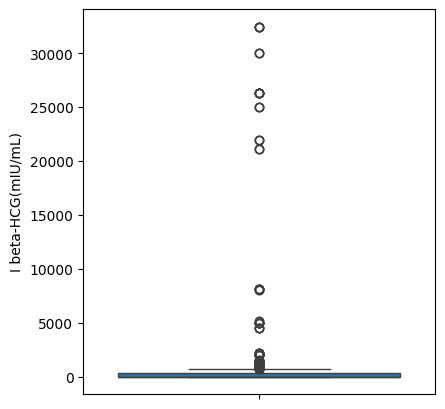

In [125]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['I beta-HCG(mIU/mL)'])
plt.show()

In [126]:
#log transformation + iqr method is used

X_train['I beta-HCG(mIU/mL)'] = np.log1p(X_train['I beta-HCG(mIU/mL)'])
X_test['I beta-HCG(mIU/mL)']  = np.log1p(X_test['I beta-HCG(mIU/mL)'])

In [127]:
Q1 = X_train['I beta-HCG(mIU/mL)'].quantile(0.25)
Q3 = X_train['I beta-HCG(mIU/mL)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['I beta-HCG(mIU/mL)'] = X_train['I beta-HCG(mIU/mL)'].clip(lower_bound, upper_bound)
X_test['I beta-HCG(mIU/mL)']  = X_test['I beta-HCG(mIU/mL)'].clip(lower_bound, upper_bound)

In [128]:
print("Skew after handling:", X_train['I beta-HCG(mIU/mL)'].skew())

Skew after handling: 0.5209699078105431


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\72295556.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['II beta-HCG(mIU/mL)'])


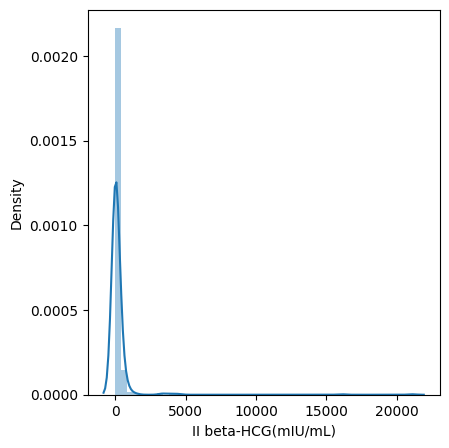

In [129]:
#another col
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_train['II beta-HCG(mIU/mL)'])
plt.show()

In [130]:
X_train['II beta-HCG(mIU/mL)'].skew()

np.float64(13.914457869790171)

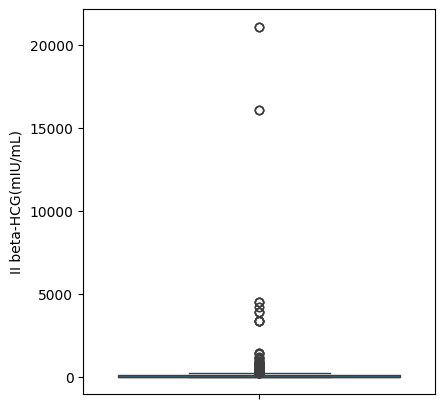

In [131]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['II beta-HCG(mIU/mL)'])
plt.show()

In [132]:
#log transform + iqr
X_train['II beta-HCG(mIU/mL)'] = np.log1p(X_train['II beta-HCG(mIU/mL)'])
X_test['II beta-HCG(mIU/mL)']  = np.log1p(X_test['II beta-HCG(mIU/mL)'])

In [133]:
Q1 = X_train['II beta-HCG(mIU/mL)'].quantile(0.25)
Q3 = X_train['II beta-HCG(mIU/mL)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['II beta-HCG(mIU/mL)'] = X_train['II beta-HCG(mIU/mL)'].clip(lower_bound, upper_bound)
X_test['II beta-HCG(mIU/mL)']  = X_test['II beta-HCG(mIU/mL)'].clip(lower_bound, upper_bound)


In [134]:
print("Skew after handling:", X_train['II beta-HCG(mIU/mL)'].skew())

Skew after handling: 1.1212680650599782


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\3464992412.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['FSH(mIU/mL)'])


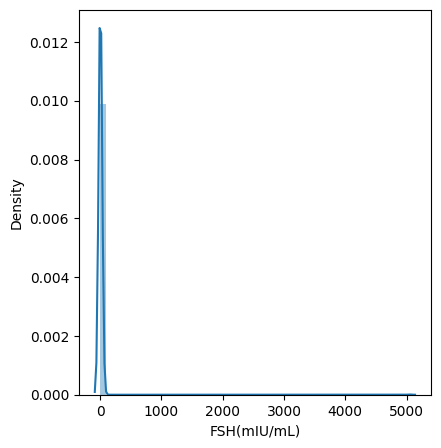

In [135]:
#another column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_train['FSH(mIU/mL)'])
plt.show()

In [136]:
X_train['FSH(mIU/mL)'].skew()

np.float64(39.930400139081115)

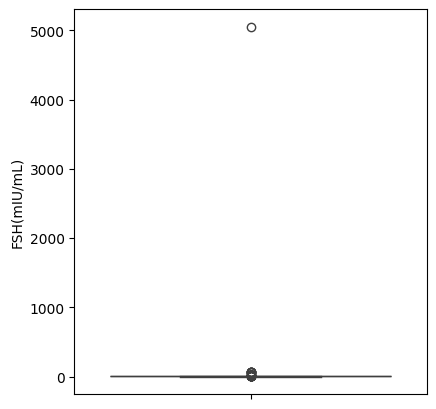

In [137]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['FSH(mIU/mL)'])
plt.show()

In [138]:
X_train['FSH(mIU/mL)'] = np.log1p(X_train['FSH(mIU/mL)'])
X_test['FSH(mIU/mL)']  = np.log1p(X_test['FSH(mIU/mL)'])

In [139]:
Q1 = X_train['FSH(mIU/mL)'].quantile(0.25)
Q3 = X_train['FSH(mIU/mL)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['FSH(mIU/mL)'] = X_train['FSH(mIU/mL)'].clip(lower_bound, upper_bound)
X_test['FSH(mIU/mL)']  = X_test['FSH(mIU/mL)'].clip(lower_bound, upper_bound)

In [140]:
print("Skew after handling:", X_train['FSH(mIU/mL)'].skew())

Skew after handling: -0.2703877310478658


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\3027877458.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['LH(mIU/mL)'])


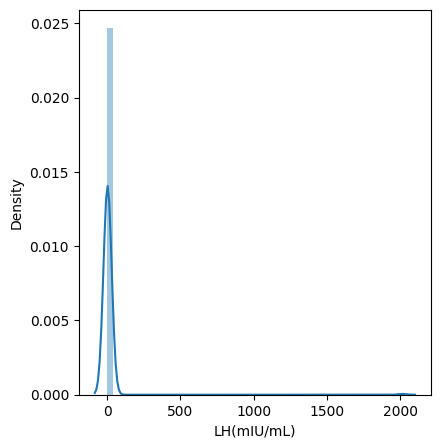

In [141]:
#another column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_train['LH(mIU/mL)'])
plt.show()

In [142]:
X_train['LH(mIU/mL)'].skew()

np.float64(16.244482170098873)

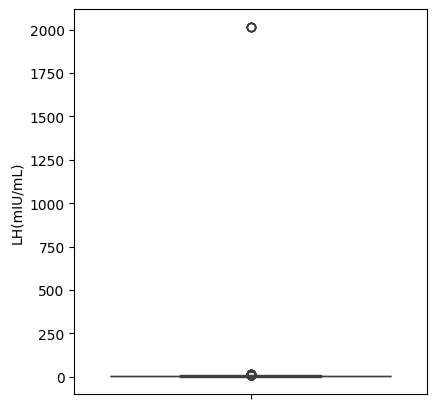

In [143]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['LH(mIU/mL)'])
plt.show()

In [144]:
X_train['LH(mIU/mL)'] = np.log1p(X_train['LH(mIU/mL)'])
X_test['LH(mIU/mL)']  = np.log1p(X_test['LH(mIU/mL)'])

In [145]:
Q1 = X_train['LH(mIU/mL)'].quantile(0.25)
Q3 = X_train['LH(mIU/mL)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['LH(mIU/mL)'] = X_train['LH(mIU/mL)'].clip(lower_bound, upper_bound)
X_test['LH(mIU/mL)']  = X_test['LH(mIU/mL)'].clip(lower_bound, upper_bound)

In [146]:
print("Skew after handling:", X_train['LH(mIU/mL)'].skew())

Skew after handling: 0.09495364774034695


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\1800220160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['FSH/LH'])


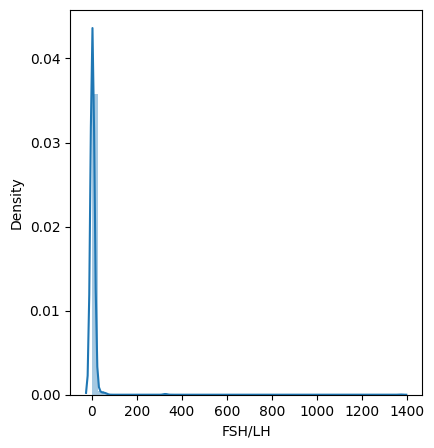

In [147]:
#another column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_train['FSH/LH'])
plt.show()

In [148]:
X_train['FSH/LH'].skew()

np.float64(31.835350405211656)

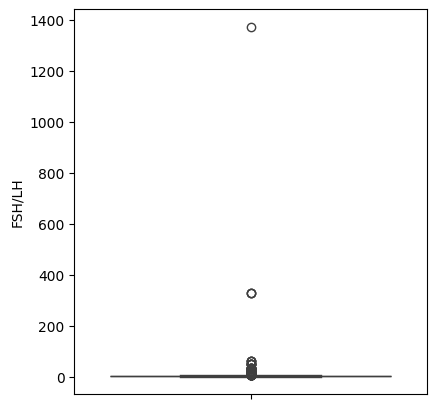

In [149]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['FSH/LH'])
plt.show()

In [150]:
X_train['FSH/LH'] = np.log1p(X_train['FSH/LH'])
X_test['FSH/LH']  = np.log1p(X_test['FSH/LH'])

In [151]:
Q1 = X_train['FSH/LH'].quantile(0.25)
Q3 = X_train['FSH/LH'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['FSH/LH'] = X_train['FSH/LH'].clip(lower_bound, upper_bound)
X_test['FSH/LH']  = X_test['FSH/LH'].clip(lower_bound, upper_bound)

In [152]:
print("Skew after handling:", X_train['FSH/LH'].skew())

Skew after handling: 0.7356032381358019


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\929228909.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Waist:Hip Ratio'])


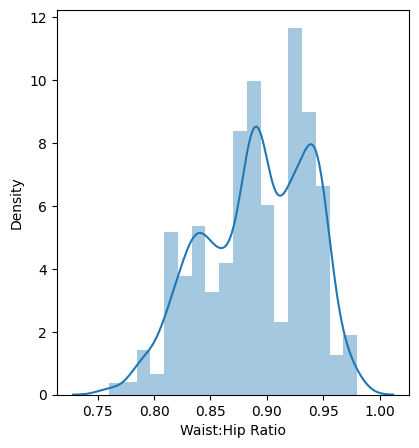

In [153]:
#another column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_train['Waist:Hip Ratio'])
plt.show()

In [154]:
X_train['Waist:Hip Ratio'].skew()

np.float64(-0.3605944226525517)

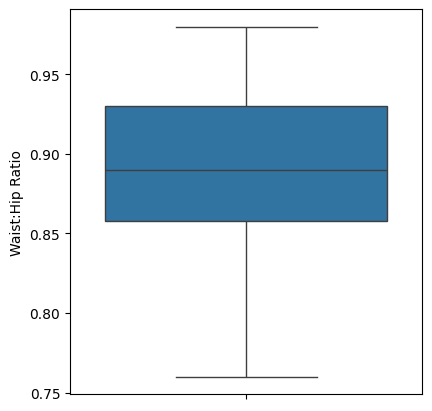

In [155]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['Waist:Hip Ratio'])
plt.show()

C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\2383282950.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['TSH(mIU/L)'])


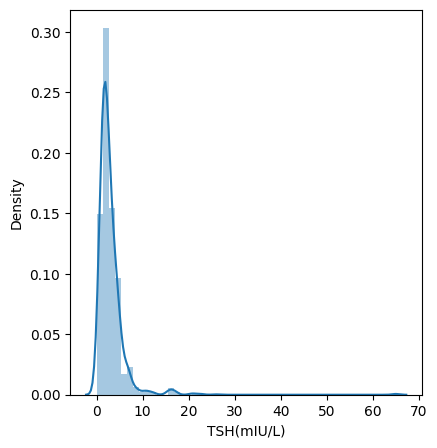

In [156]:
#another column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_train['TSH(mIU/L)'])
plt.show()

In [157]:
X_train['TSH(mIU/L)'].skew()

np.float64(9.31202500802074)

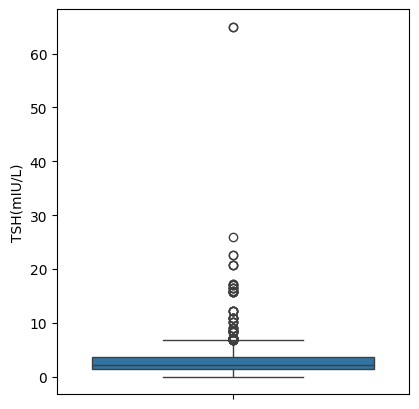

In [158]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['TSH(mIU/L)'])
plt.show()

In [159]:
X_train['TSH(mIU/L)']= np.log1p(X_train['TSH(mIU/L)'])
X_test['TSH(mIU/L)']  = np.log1p(X_test['TSH(mIU/L)'])

In [160]:
Q1 = X_train['TSH(mIU/L)'].quantile(0.25)
Q3 = X_train['TSH(mIU/L)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['TSH(mIU/L)'] = X_train['TSH(mIU/L)'].clip(lower_bound, upper_bound)
X_test['TSH(mIU/L)']  = X_test['TSH(mIU/L)'].clip(lower_bound, upper_bound)


In [161]:
print("Skew after handling:", X_train['TSH(mIU/L)'].skew())

Skew after handling: 0.43481935609923006


In [162]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# sns.distplot(X_train['AMH(ng/mL)'])
# plt.show()


#this code gives error because this col might contain atleast one non numerical val

In [163]:
  #this col contains atleast one non numeric value

In [164]:
X_train['AMH(ng/mL)'] = pd.to_numeric(X_train['AMH(ng/mL)'], errors='coerce')
X_test['AMH(ng/mL)']  = pd.to_numeric(X_test['AMH(ng/mL)'], errors='coerce')


In [165]:
median_amh = X_train['AMH(ng/mL)'].median()

X_train['AMH(ng/mL)'].fillna(median_amh, inplace=True)
X_test['AMH(ng/mL)'].fillna(median_amh, inplace=True)


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\2477491429.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['AMH(ng/mL)'].fillna(median_amh, inplace=True)
C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\2477491429.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\1451486582.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['AMH(ng/mL)'])


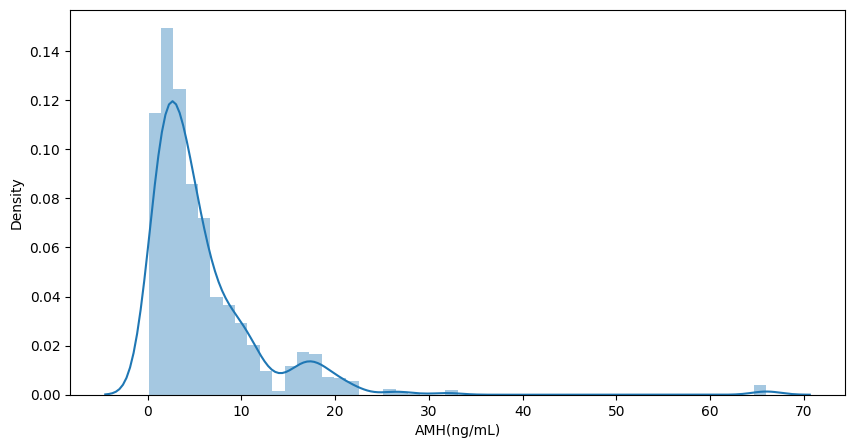

In [166]:
plt.figure(figsize=(10,5))
sns.distplot(X_train['AMH(ng/mL)'])
plt.show()

In [167]:
X_train['AMH(ng/mL)'].skew()

np.float64(4.290554473466833)

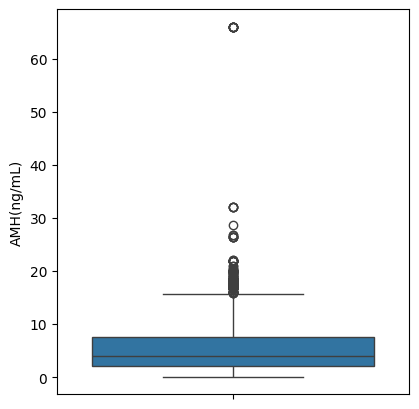

In [168]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['AMH(ng/mL)'])
plt.show()

In [169]:
X_train['AMH(ng/mL)'] = np.log1p(X_train['AMH(ng/mL)'])
X_test['AMH(ng/mL)'] = np.log1p(X_test['AMH(ng/mL)'])

In [170]:
Q1 = X_train['AMH(ng/mL)'].quantile(0.25)
Q3 = X_train['AMH(ng/mL)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['AMH(ng/mL)'] = X_train['AMH(ng/mL)'].clip(lower_bound, upper_bound)
X_test['AMH(ng/mL)']  = X_test['AMH(ng/mL)'].clip(lower_bound, upper_bound)


In [171]:
print("Skewness after handling:" , X_train['AMH(ng/mL)'].skew())

Skewness after handling: 0.26106881957437256


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\593202602.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['PRL(ng/mL)'])


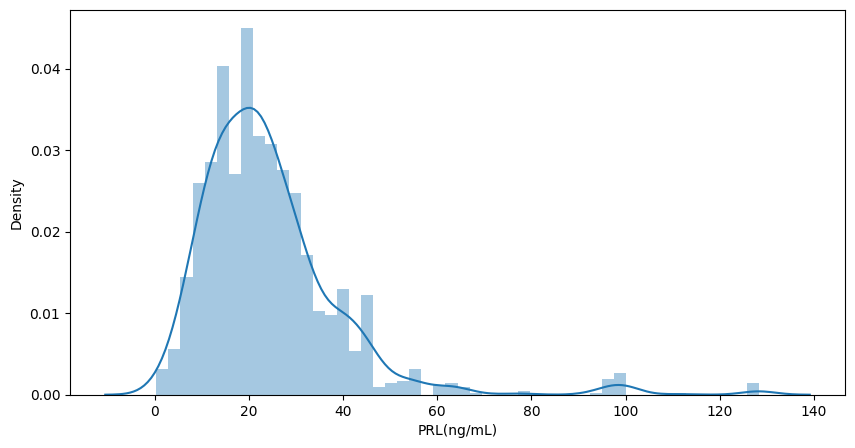

In [172]:
#another column
plt.figure(figsize=(10,5))
sns.distplot(X_train['PRL(ng/mL)'])
plt.show()

In [173]:
X_train['PRL(ng/mL)'].skew()

np.float64(2.664380633528951)

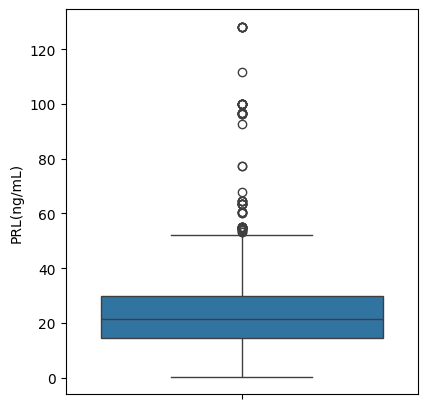

In [174]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['PRL(ng/mL)'])
plt.show()

In [175]:
X_train['PRL(ng/mL)'] = np.log1p(X_train['PRL(ng/mL)'])
X_test['PRL(ng/mL)']  = np.log1p(X_test['PRL(ng/mL)'])

In [176]:
Q1 = X_train['PRL(ng/mL)'].quantile(0.25)
Q3 = X_train['PRL(ng/mL)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['PRL(ng/mL)'] = X_train['PRL(ng/mL)'].clip(lower_bound, upper_bound)
X_test['PRL(ng/mL)']  = X_test['PRL(ng/mL)'].clip(lower_bound, upper_bound)


In [177]:
print("Skew after handling:", X_train['PRL(ng/mL)'].skew())

Skew after handling: -0.16508565361182237


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\2606822280.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Vit D3(ng/mL)'])


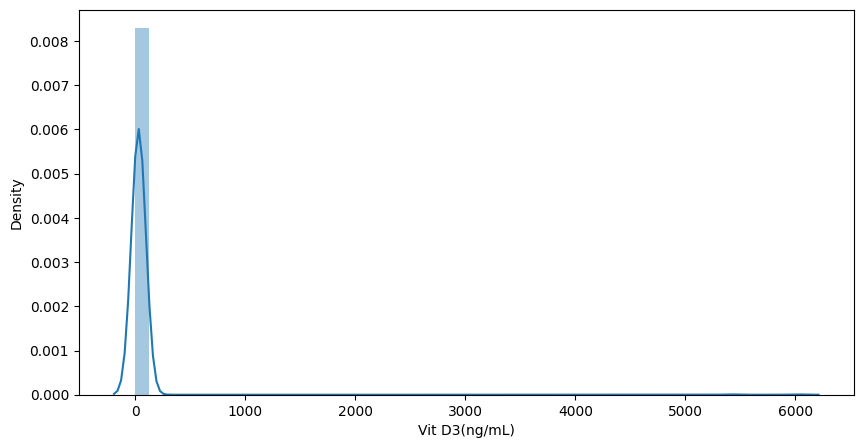

In [178]:
#another column
plt.figure(figsize=(10,5))
sns.distplot(X_train['Vit D3(ng/mL)'])
plt.show()

In [179]:
X_train['Vit D3(ng/mL)'].skew()

np.float64(19.97137552596789)

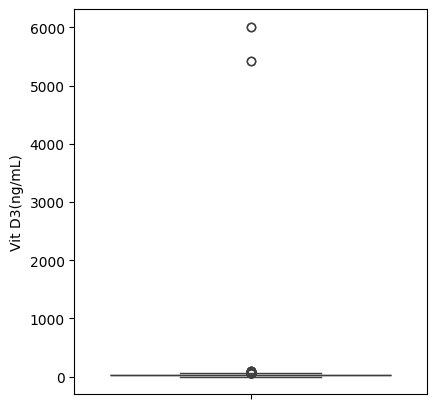

In [180]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['Vit D3(ng/mL)'])
plt.show()

In [181]:
X_train['Vit D3(ng/mL)'] = np.log1p(X_train['Vit D3(ng/mL)'])
X_test['Vit D3(ng/mL)']  = np.log1p(X_test['Vit D3(ng/mL)'])

In [182]:
Q1 = X_train['Vit D3(ng/mL)'].quantile(0.25)
Q3 = X_train['Vit D3(ng/mL)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['Vit D3(ng/mL)'] = X_train['Vit D3(ng/mL)'].clip(lower_bound, upper_bound)
X_test['Vit D3(ng/mL)']  = X_test['Vit D3(ng/mL)'].clip(lower_bound, upper_bound)


In [183]:
print("Skew after handling:", X_train['Vit D3(ng/mL)'].skew())

Skew after handling: -0.08352282877253198


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\3350434090.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['PRG(ng/mL)'])


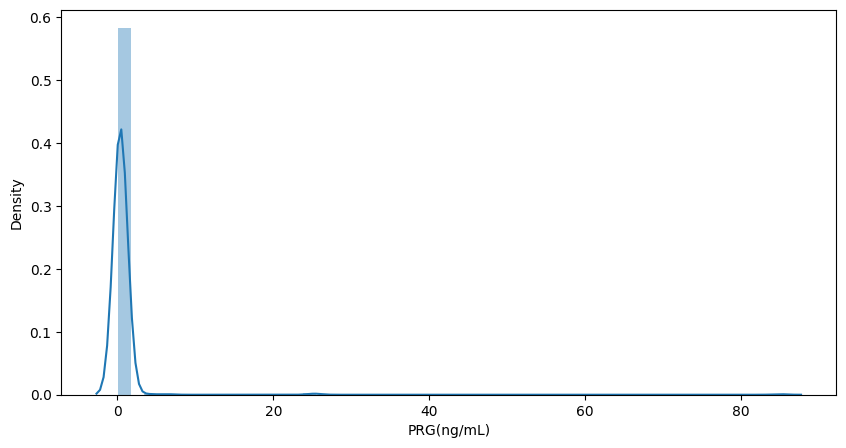

In [184]:
#another column
plt.figure(figsize=(10,5))
sns.distplot(X_train['PRG(ng/mL)'])
plt.show()

In [185]:
X_train['PRG(ng/mL)'].skew()

np.float64(18.807646843513247)

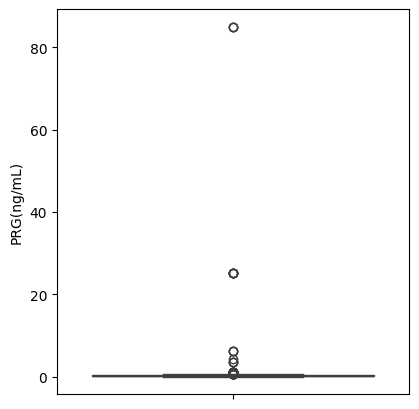

In [186]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['PRG(ng/mL)'])
plt.show()

In [187]:
X_train['PRG(ng/mL)'] = np.log1p(X_train['PRG(ng/mL)'])
X_test['PRG(ng/mL)']  = np.log1p(X_test['PRG(ng/mL)'])

In [188]:
Q1 = X_train['PRG(ng/mL)'].quantile(0.25)
Q3 = X_train['PRG(ng/mL)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['PRG(ng/mL)'] = X_train['PRG(ng/mL)'].clip(lower_bound, upper_bound)
X_test['PRG(ng/mL)']  = X_test['PRG(ng/mL)'].clip(lower_bound, upper_bound)


In [189]:
print("Skew after handling:", X_train['PRG(ng/mL)'].skew())

Skew after handling: 1.0389537513165619


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\615182557.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['RBS(mg/dl)'])


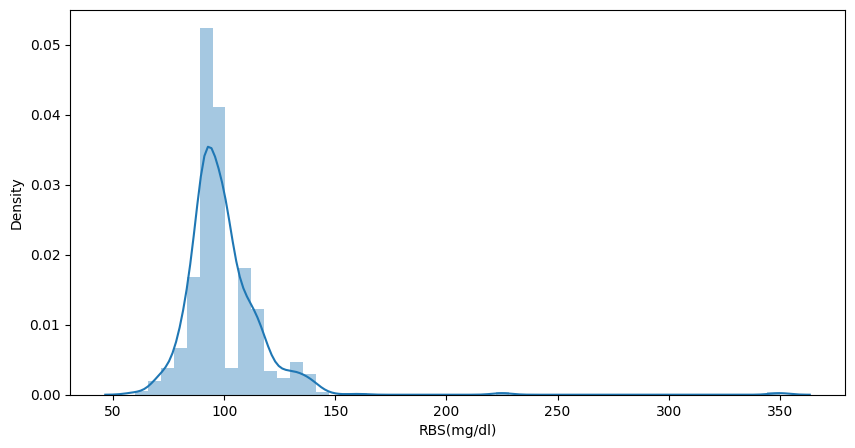

In [190]:
#another column
plt.figure(figsize=(10,5))
sns.distplot(X_train['RBS(mg/dl)'])
plt.show()

In [191]:
X_train['RBS(mg/dl)'].skew()

np.float64(6.017520149095122)

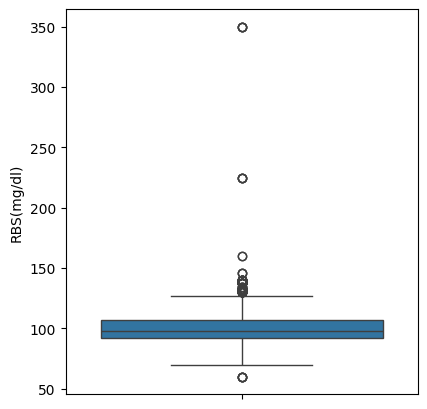

In [192]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['RBS(mg/dl)'])
plt.show()

In [193]:
X_train['RBS(mg/dl)'] = np.log1p(X_train['RBS(mg/dl)'])
X_test['RBS(mg/dl)']  = np.log1p(X_test['RBS(mg/dl)'])

In [194]:
Q1 = X_train['RBS(mg/dl)'].quantile(0.25)
Q3 = X_train['RBS(mg/dl)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train['RBS(mg/dl)'] = X_train['RBS(mg/dl)'].clip(lower_bound, upper_bound)
X_test['RBS(mg/dl)']  = X_test['RBS(mg/dl)'].clip(lower_bound, upper_bound)


In [195]:
print("Skew after handling:", X_train['RBS(mg/dl)'].skew())

Skew after handling: 0.36974706313083366


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\3114502564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['BP _Diastolic(mmHg)'])


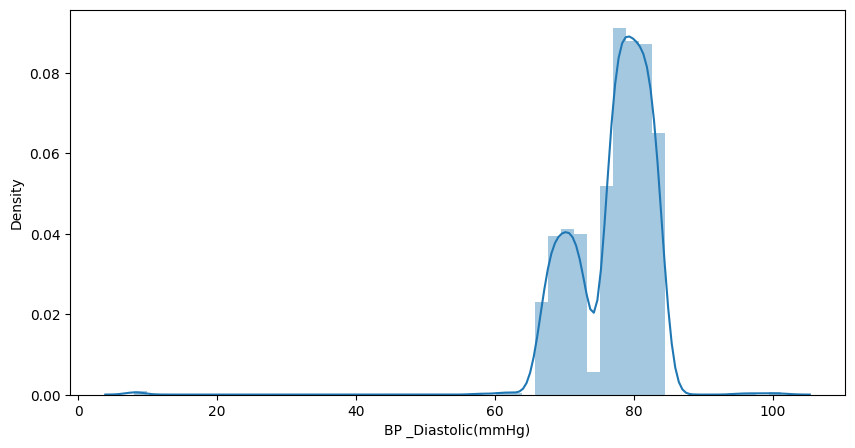

In [196]:
#another column
plt.figure(figsize=(10,5))
sns.distplot(X_train['BP _Diastolic(mmHg)'])
plt.show()

In [197]:
X_train['BP _Diastolic(mmHg)'].skew()

np.float64(-3.1696789194206962)

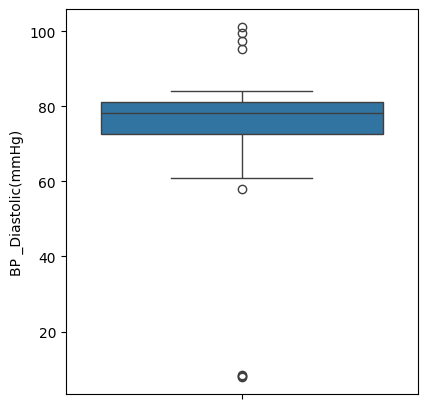

In [198]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['BP _Diastolic(mmHg)'])
plt.show()

In [199]:
#only iqr
Q1 = X_train['BP _Diastolic(mmHg)'].quantile(0.25)
Q3 = X_train['BP _Diastolic(mmHg)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [200]:
X_train['BP _Diastolic(mmHg)'] = X_train['BP _Diastolic(mmHg)'].clip(lower_bound, upper_bound)
X_test['BP _Diastolic(mmHg)']  = X_test['BP _Diastolic(mmHg)'].clip(lower_bound, upper_bound)


In [201]:
print("Skew after handling:", X_train['BP _Diastolic(mmHg)'].skew())

Skew after handling: -0.6015860182961884


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\598827886.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['BP _Systolic(mmHg)'])


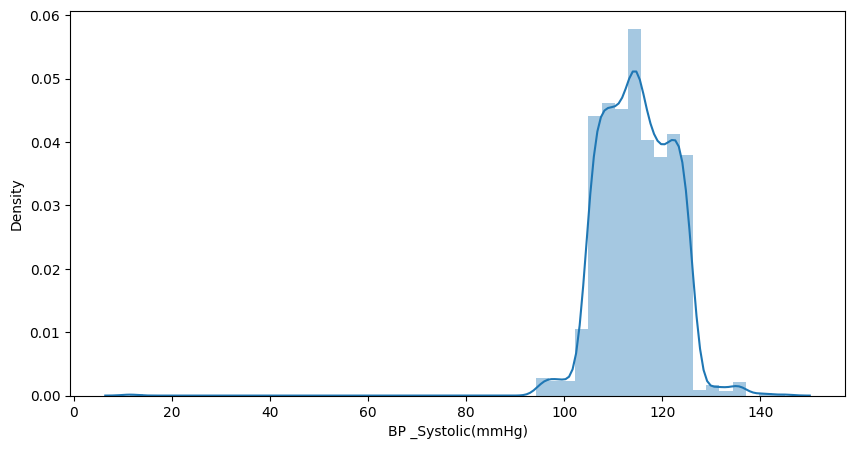

In [202]:
#another column
plt.figure(figsize=(10,5))
sns.distplot(X_train['BP _Systolic(mmHg)'])
plt.show()

In [203]:
X_train['BP _Systolic(mmHg)'].skew()

np.float64(-1.573825043668517)

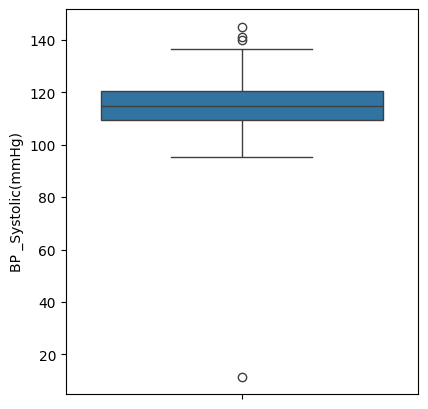

In [204]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['BP _Systolic(mmHg)'])
plt.show()

In [205]:
Q1 = X_train['BP _Systolic(mmHg)'].quantile(0.25)
Q3 = X_train['BP _Systolic(mmHg)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [206]:
X_train['BP _Systolic(mmHg)'] = X_train['BP _Systolic(mmHg)'].clip(lower_bound, upper_bound)
X_test['BP _Systolic(mmHg)']  = X_test['BP _Systolic(mmHg)'].clip(lower_bound, upper_bound)


In [207]:
print("Skew after handling:", X_train['BP _Systolic(mmHg)'].skew())

Skew after handling: 0.07371416502541658


C:\Users\Banty\AppData\Local\Temp\ipykernel_23240\3309041269.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Endometrium(mm)'])


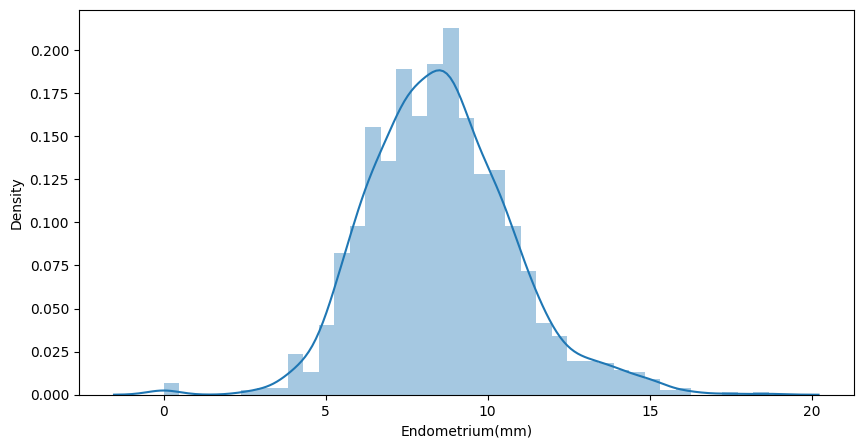

In [208]:
#another column
plt.figure(figsize=(10,5))
sns.distplot(X_train['Endometrium(mm)'])
plt.show()

In [209]:
X_train['Endometrium(mm)'].skew()

np.float64(0.3697938006795786)

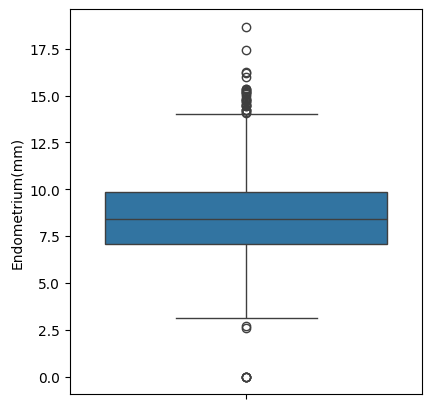

In [210]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(X_train['Endometrium(mm)'])
plt.show()

In [211]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [212]:
#converted back to dataframe

X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)


In [213]:
y_train.value_counts()   #dataset is not imbalanced. Hence no need of smote here


PCOS(Y/N)
0    1114
1     486
Name: count, dtype: int64

In [214]:
#RANDOM FOREST CLASSIFIER

In [215]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)


In [216]:
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [217]:
y_pred = model_rf.predict(X_test)

In [218]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [219]:
y_test

286     0
1484    1
1294    0
1495    0
551     1
       ..
1900    0
333     1
449     0
1056    0
1151    0
Name: PCOS(Y/N), Length: 400, dtype: int64

In [220]:
model_rf.score(X_test, y_test)

0.965

In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       278
           1       0.98      0.90      0.94       122

    accuracy                           0.96       400
   macro avg       0.97      0.95      0.96       400
weighted avg       0.97      0.96      0.96       400



In [222]:
print(confusion_matrix(y_test, y_pred))

[[276   2]
 [ 12 110]]


In [223]:
print("F1 Score:", f1_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


F1 Score: 0.9401709401709402
Accuracy: 0.965


In [224]:
#LOGISTIC REGRESSION

In [234]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver="liblinear", max_iter=1000, class_weight="balanced")

In [235]:
model_lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [236]:
y_pred = model_lr.predict(X_test_scaled)

In [238]:
model_lr.score(X_test_scaled, y_test)

0.915

In [239]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       278
           1       0.83      0.91      0.87       122

    accuracy                           0.92       400
   macro avg       0.89      0.91      0.90       400
weighted avg       0.92      0.92      0.92       400



In [240]:
print(confusion_matrix(y_test, y_pred))

[[255  23]
 [ 11 111]]


In [241]:
print("F1 Score:", f1_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


F1 Score: 0.8671875
Accuracy: 0.915


In [ ]:
#SVM

In [260]:
from sklearn.svm import SVC

model_svm = SVC(kernel="rbf", C=10, gamma="scale", probability=True, class_weight="balanced", random_state=42)

In [261]:
model_svm.fit(X_train_scaled, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [262]:
y_pred = model_svm.predict(X_test_scaled)

In [263]:
model_svm.score(X_test_scaled, y_test)

1.0

In [264]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       122

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [265]:
print(confusion_matrix(y_test, y_pred))

[[278   0]
 [  0 122]]


In [266]:
print("F1 Score:", f1_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


F1 Score: 1.0
Accuracy: 1.0


In [ ]:
#SAVING THE MODEL

In [276]:
import pickle

In [277]:
filename = 'pcos_random_forest.sav'


In [278]:
pickle.dump(model_rf, open(filename, 'wb'))

In [279]:
pickle.dump(list(X.columns), open('model_columns.sav', 'wb'))

In [280]:
load_model = pickle.load(open(filename, 'rb'))